<h1>Agenda</h1>
1. Business Problem<br>
2. Data collection <br>
3. Tools setup for project<br>
4. Load data<br>
5. Data Preprocessing<br>
6. Make data ready for Training<br>
7. Ml Model Selection<br>
8. Model training<br>
9. Cross Validation<br>
10. Fine Tune Model<br>
11. Ml Model Testing<br>
12. Present Solution<br>
13. Creat Web App<br>
14. Model Deployment<br>

## 1. Importing Libraries
We import essential libraries such as Pandas, NumPy for data manipulation, 
Matplotlib and Seaborn for visualization, and Scikit-learn for model training.


In [114]:
# importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

import pickle


## 2. Load the Dataset
We load the dataset using Pandas and display the first few rows to understand the structure.


In [15]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3. Data Preprocessing
We check for missing values and handle them appropriately by either filling or dropping rows.


In [18]:
## concat train and test
df = pd.concat((train, test))
temp_df = df
print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


In [19]:
# getting brief info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [20]:

# Most Null Value features
""" Alley
FireplaceQu
PoolQC
Fence
MiscFeature """

' Alley\nFireplaceQu\nPoolQC\nFence\nMiscFeature '

In [21]:
# extracting the integer columns
int_feature = df.select_dtypes(include = ["int64"]).columns
print("Total numbe of int64 columns: ",int_feature.shape[0])
print("int_feature name : ",int_feature)

Total numbe of int64 columns:  26
int_feature name :  Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [22]:
# extracting the float columns
float_feature = df.select_dtypes(include = ["float64"]).columns
print("Total numbe of float64 columns: ",float_feature.shape[0])
print("float_feature name : ",float_feature)

Total numbe of float64 columns:  12
float_feature name :  Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


In [23]:
# extracting the object columns
cat_feature = df.select_dtypes(include = ["object"]).columns
print("Total numbe of object columns: ",cat_feature.shape[0])
print("cat_feature name : ",cat_feature)

Total numbe of object columns:  43
cat_feature name :  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [24]:
# Extracting Stastical Information of Numerical Features
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 4. Exploratory Data Analysis (EDA)
We visualize the price distribution to understand how house prices vary in the dataset.


In [25]:
# creating a copy of dataframe
df_mvi = df.copy()

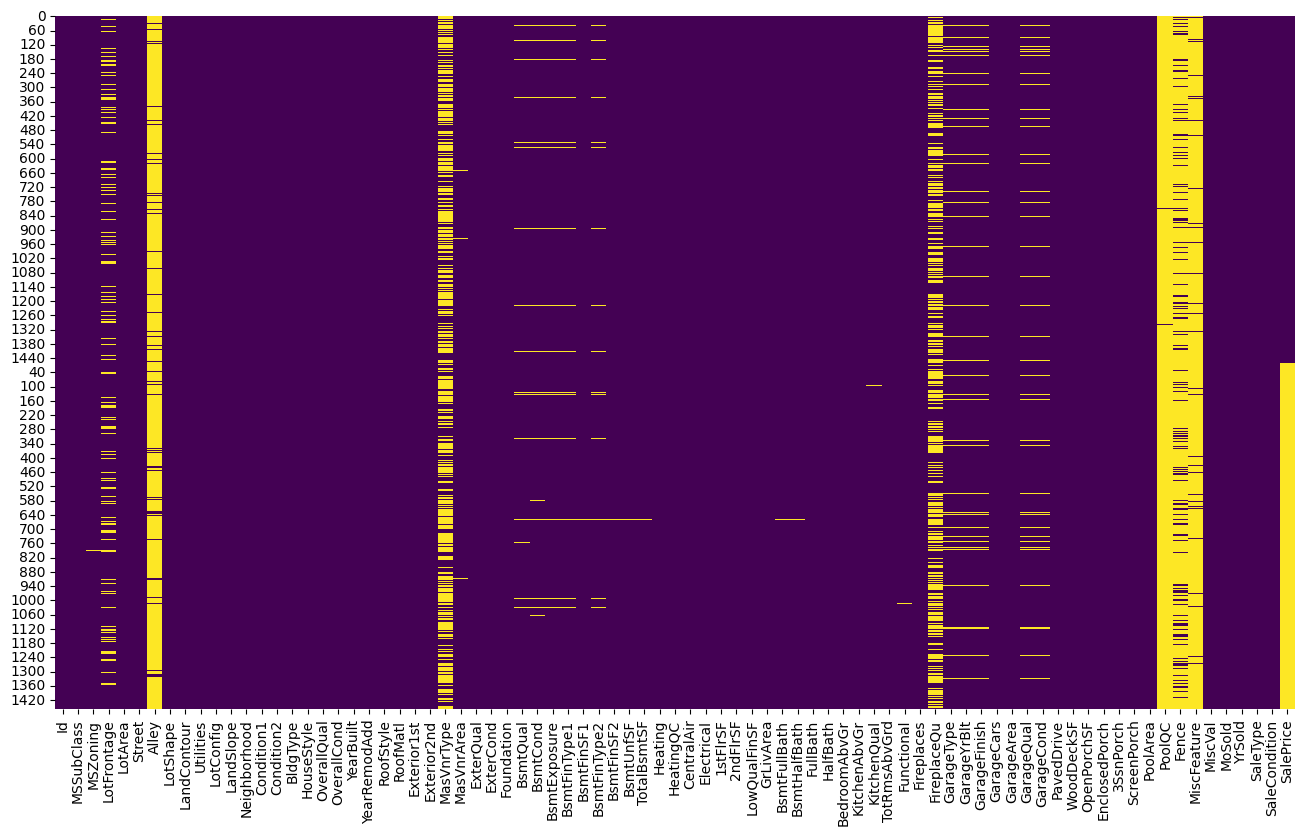

In [26]:
# visualizing the missing values through heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.savefig('heatmap_df_mvi_of_null_values.png')

In [27]:
# reindexing the dataframe with Id
df.set_index('Id', inplace=True)

In [28]:
# checking the percentage of missing values
null_percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
null_percent    = null_percent[null_percent > 0]
null_percent 

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Utilities        0.068517
BsmtFullBath     0.068517
Functional       0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
GarageArea       0.034258
GarageCars       0.034258
SaleType         0.034258
KitchenQual      0.034258
BsmtFinSF1       0.034258
Electrical       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
dtype: float64

In [29]:
# finding the missing value percentage between 20 to 50
miss_value_20_50_perc = null_percent[(null_percent > 20 )& (null_percent < 51)]
miss_value_20_50_perc

SalePrice      49.982871
FireplaceQu    48.646797
dtype: float64

In [30]:
# finding the missing value percentage between 5 to 20
miss_value_5_20_perc = null_percent[(null_percent > 5 )& (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
dtype: float64

<Axes: ylabel='Id'>

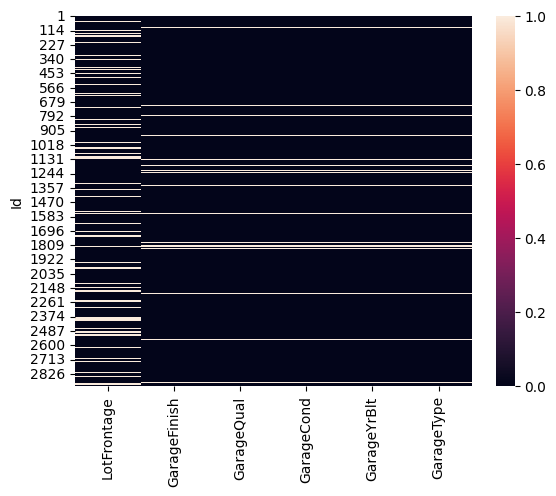

In [31]:
# visualizing the missing values between 5% to 20% through heatmap
sns.heatmap(df[miss_value_5_20_perc.index].isnull())

In [32]:
# Missing Value Imputation
# extracting all the columns having missing values
missing_value_feature = null_percent[null_percent > 0]
print("Total number of feature having missing value: ",missing_value_feature.shape[0])

Total number of feature having missing value:  35


In [33]:
# extracting the categorical feature having missing values
cat_na_feature = df[cat_feature].isnull().sum().sort_values(ascending=False)
print("Number of categorical feature having missing value: ",cat_na_feature[cat_na_feature > 0].shape[0])
print("Categorical feature having missing value: ",cat_na_feature[cat_na_feature > 0])
cat_na_feature.all()

Number of categorical feature having missing value:  23
Categorical feature having missing value:  PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
KitchenQual        1
Electrical         1
dtype: int64


False

In [34]:
# extracting the integer feature having missing values
int_na_feature = missing_value_feature[missing_value_feature.keys().isin(int_feature)]
print("Number of integer feature having missing value: ",len(int_na_feature))
print("Integer feature having missing value: ",int_na_feature)
int_na_feature

Number of integer feature having missing value:  0
Integer feature having missing value:  Series([], dtype: float64)


Series([], dtype: float64)

In [35]:
# extracting the float feature having missing values
float_na_feature = missing_value_feature[missing_value_feature.keys().isin(float_feature)]
print("Number of float feature having missing value: ",len(float_na_feature))
print("Float feature having missing value: ",float_na_feature)

Number of float feature having missing value:  12
Float feature having missing value:  SalePrice       49.982871
LotFrontage     16.649538
GarageYrBlt      5.447071
MasVnrArea       0.787941
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
GarageArea       0.034258
GarageCars       0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
dtype: float64


Value count of MSZoning:  MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Percentage of MSZoning:  MSZoning
RL         77.595067
RM         15.758822
FV          4.761905
RH          0.890716
C (all)     0.856458
Name: count, dtype: float64


<Axes: xlabel='MSZoning', ylabel='count'>

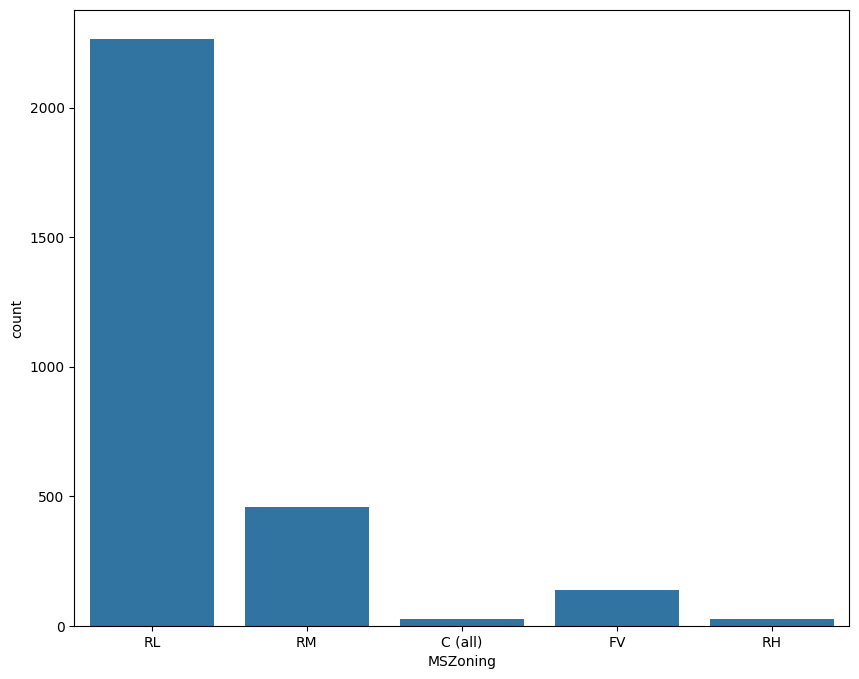

In [36]:
# handeling MsZoning = 0.137033

value_count = df["MSZoning"].value_counts()
print("Value count of MSZoning: ",value_count)
print("Percentage of MSZoning: ",value_count/df.shape[0]*100)

# visualizing the count of MSZoning
plt.figure(figsize=(10,8))
sns.countplot(x="MSZoning",data=df)


In [37]:
# imputing the missing value of MSZoning with mode
mszoning_mode = df_mvi["MSZoning"].mode()[0]
df_mvi["MSZoning"].fillna(mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [38]:
# function to visualize the count plot before and after imputation
def CountPlot(df_mvi,new_df_mvi,feature):
    # We can add docstring here
    plt.figure(figsize=(16,10))
    plt.subplot(1,2,1)
    sns.countplot(x=feature,data=df_mvi)
    plt.subplot(1,2,2)
    sns.countplot(x=feature,data=new_df_mvi)
    plt.tight_layout()
    plt.show()

# function to visualize Boxplot and Histogram
def boxHistPlot(df_mvi,figsize = (16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.boxplot(data=df_mvi)
    plt.subplot(1,2,2)
    sns.histplot(data=df_mvi, kde=True)
    plt.tight_layout()
    plt.show()

# function to visualize Boxplot and Histogram before and after imputation
def old_new_boxHistPlot(df_mvi, new_df_mvi, feature, figsize = (16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(2,2,1)
    sns.boxplot(data=df_mvi[feature])
    plt.subplot(2,2,2)
    sns.histplot(data=df_mvi[feature], kde=True)
    plt.subplot(2,2,3)
    sns.boxplot(data=new_df_mvi[feature])
    plt.subplot(2,2,4)
    sns.histplot(data=new_df_mvi[feature], kde=True)
    plt.tight_layout()
    plt.show()

Count plot of MSZoning before and after imputation


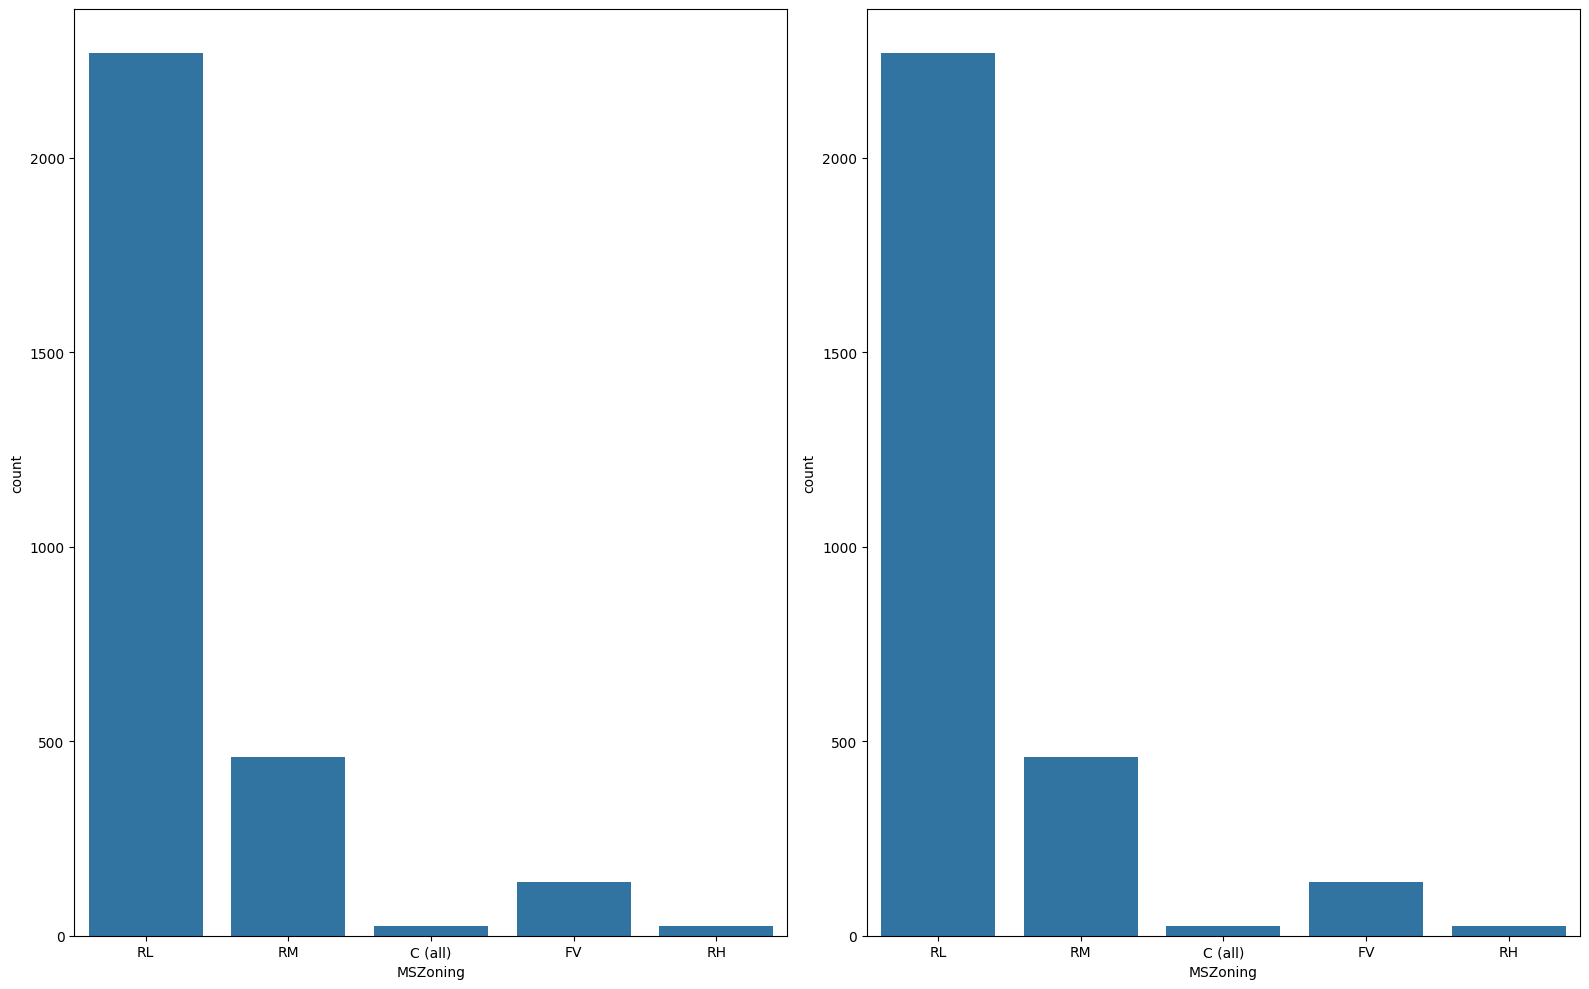

In [39]:
print("Count plot of MSZoning before and after imputation")

CountPlot(df_mvi,df_mvi,"MSZoning")

In [40]:
# Handeling Aalley feature

# imputing the missing value of Alley with None
df_mvi["Alley"].replace(np.nan, "None", inplace=True)
df_mvi["Alley"].isnull().sum()

# handeling PoolQC = 0.996574

# imputing the missing value of PoolQC with None
df_mvi["PoolQC"].replace(np.nan, "None", inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

Count plot of Alley before and after imputation


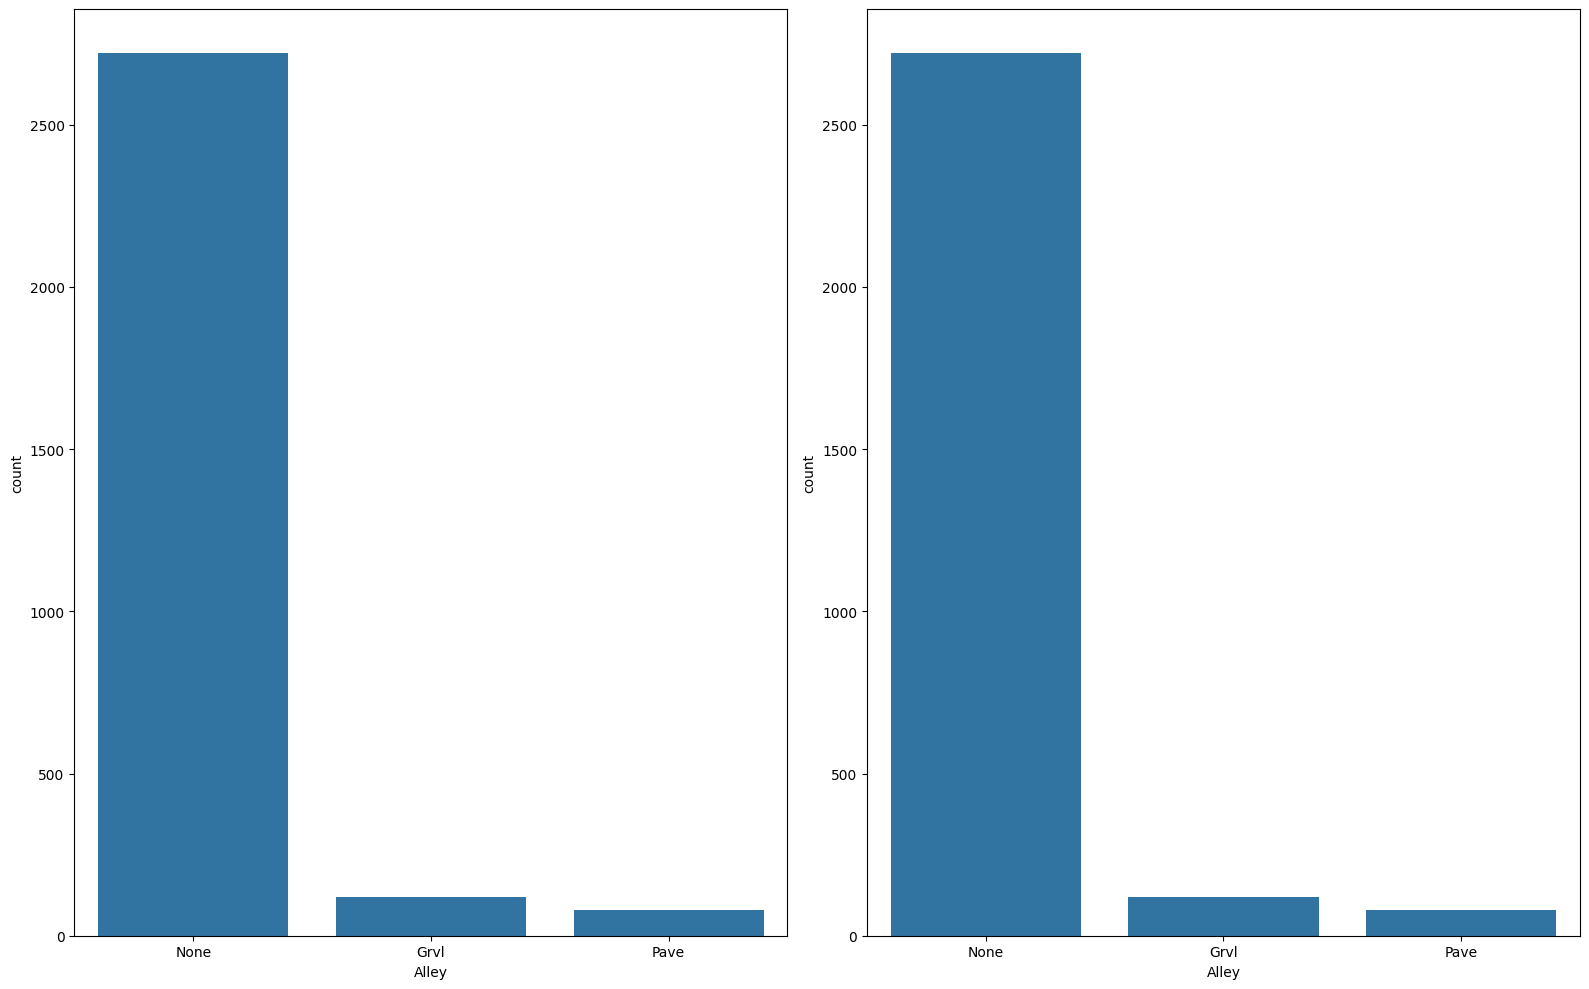

In [41]:
# visualizing the count of Alley feature before and after imputation
print("Count plot of Alley before and after imputation")
CountPlot(df_mvi,df_mvi,"Alley")

Boxplot and Histogram of LotFrontage


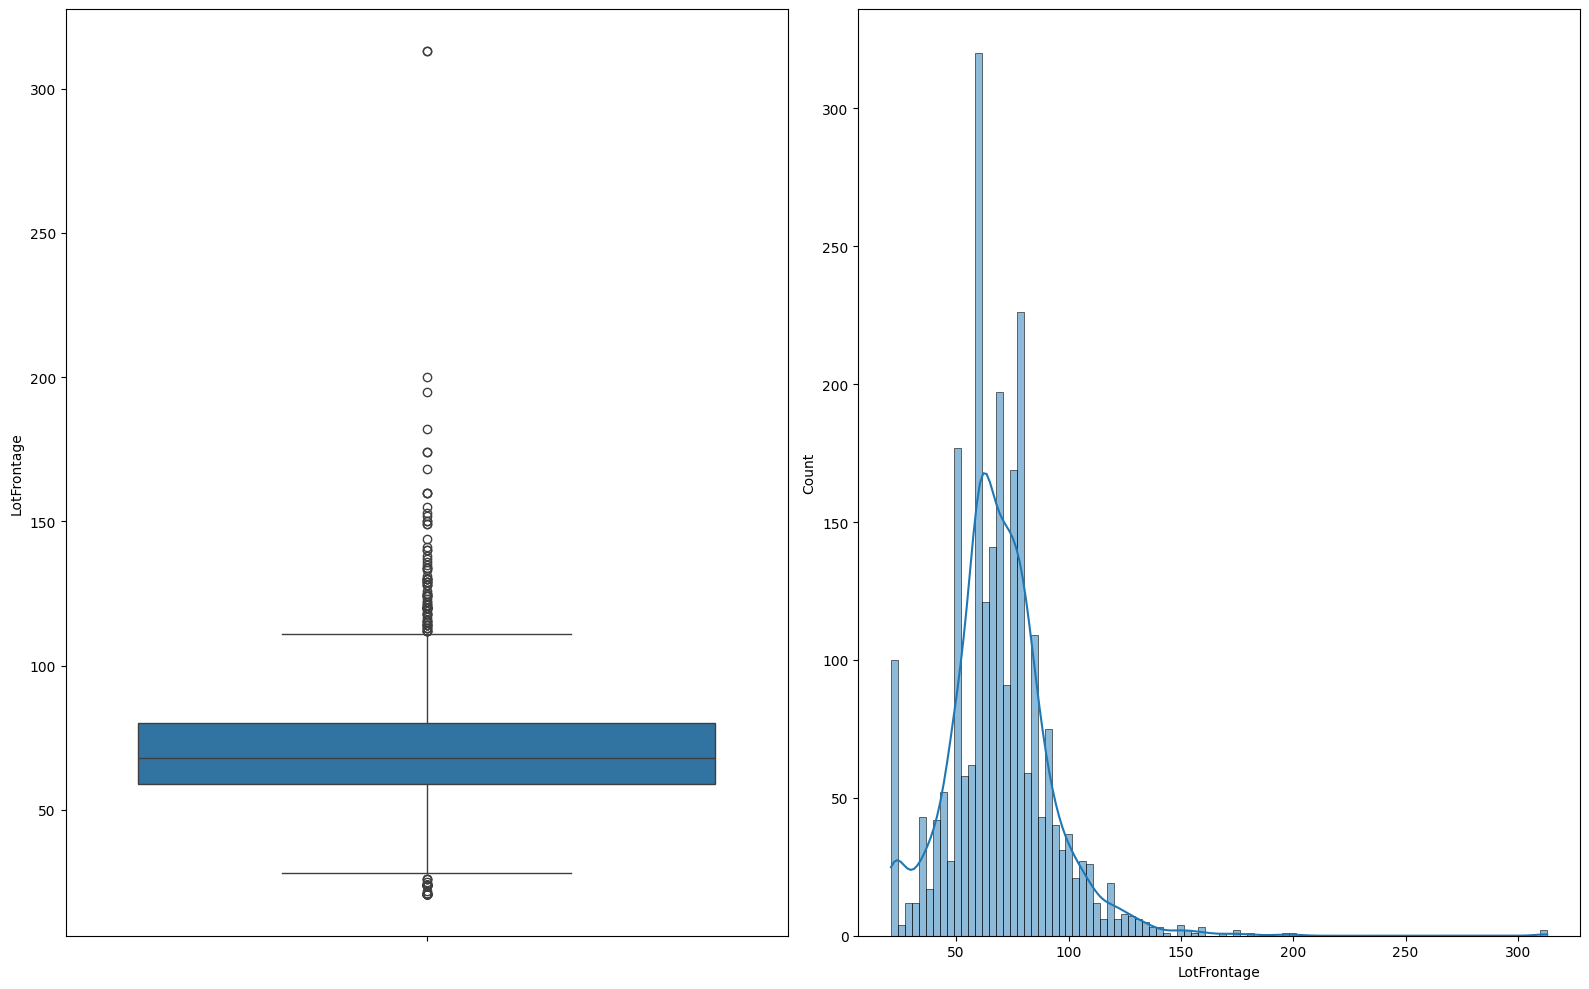

In [42]:
# Handeling LotFrontage = 16.649538

# visualizing the distribution of LotFrontage
print("Boxplot and Histogram of LotFrontage")
boxHistPlot(df_mvi["LotFrontage"])

In [43]:
# imputing the missing value of LotFrontage with mean
lotfrontage_mean = df_mvi["LotFrontage"].mean()
df_mvi["LotFrontage"].fillna(lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

Boxplot and Histogram of LotFrontage before and after imputation


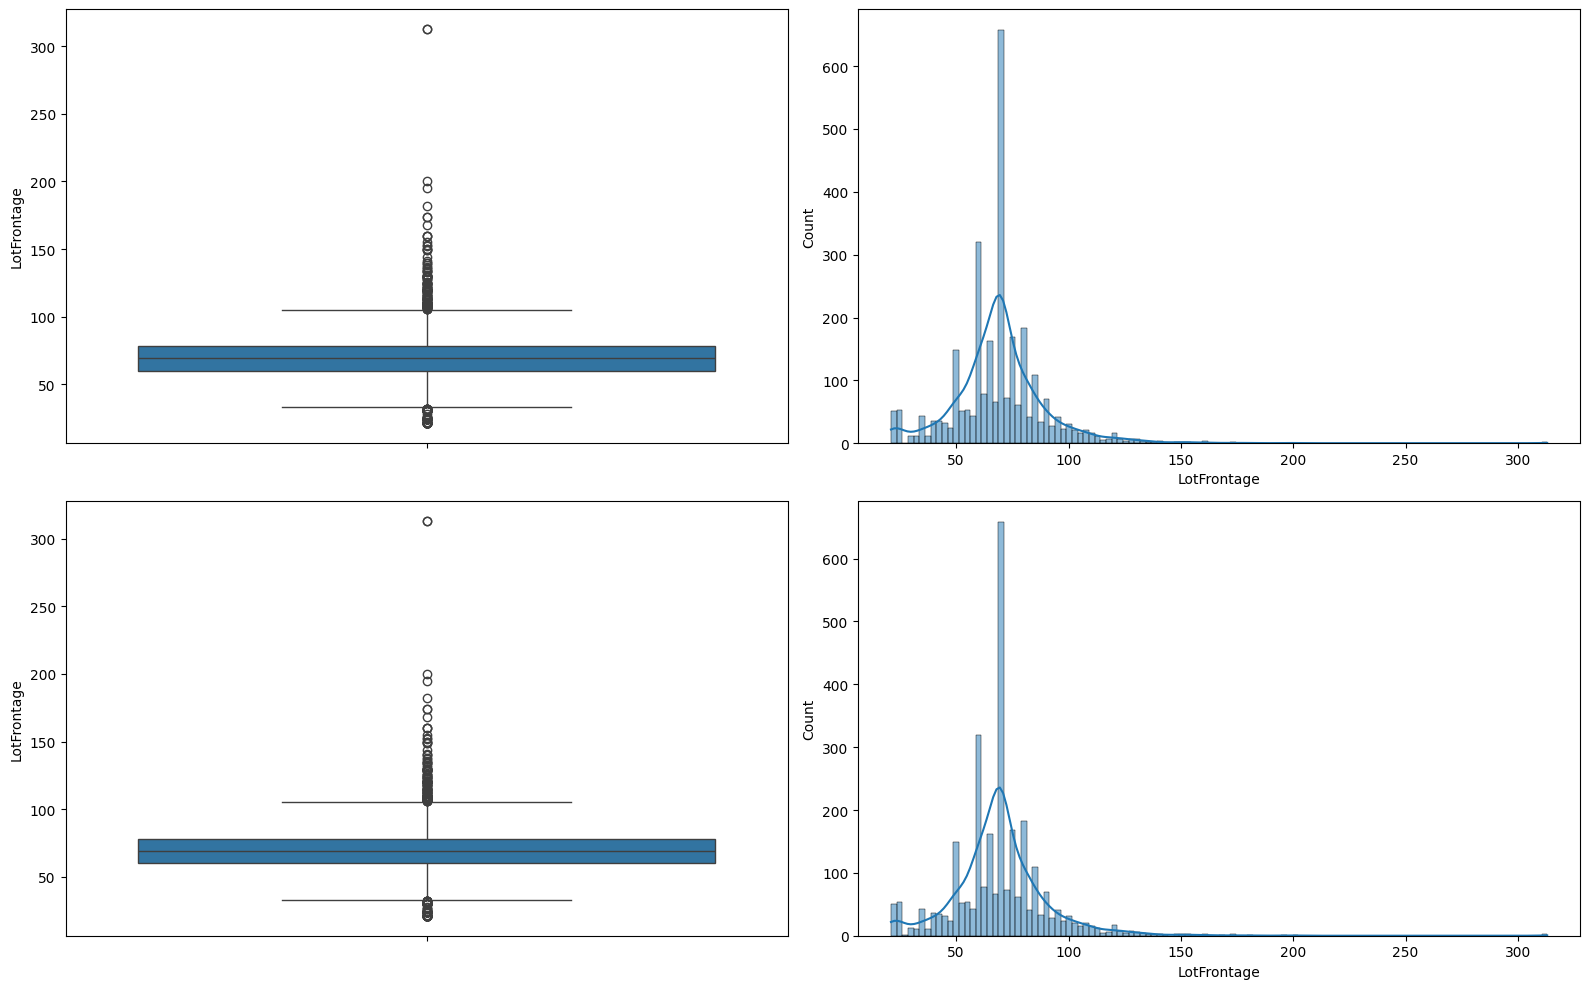

In [44]:
# visualizing the distribution of LotFrontage before and after imputation
print("Boxplot and Histogram of LotFrontage before and after imputation")
old_new_boxHistPlot(df_mvi, df_mvi, "LotFrontage")

In [45]:
# Handeling Utilities = 0.068517

# finding the value count and percentage of Utilities
print("Value count of Utilities: ",df_mvi["Utilities"].value_counts())
print("Percentage of Utilities: ",df_mvi["Utilities"].value_counts()/df_mvi.shape[0]*100)

Value count of Utilities:  Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Percentage of Utilities:  Utilities
AllPub    99.897225
NoSeWa     0.034258
Name: count, dtype: float64


In [46]:
# imputing the missing value of Utilities with mode
df_mvi["Utilities"].fillna(df_mvi["Utilities"].mode()[0], inplace=True)
df_mvi["Utilities"].isnull().sum()

0

In [47]:
# Handeling Exterior1st = 0.034258 Exterior2nd = 0.034258
# finding the value count and percentage of Exterior1st

print("Value count of Exterior1st: ",df_mvi["Exterior1st"].value_counts())
print("Percentage of Exterior1st: ",df_mvi["Exterior1st"].value_counts()/df_mvi.shape[0]*100)


Value count of Exterior1st:  Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Percentage of Exterior1st:  Exterior1st
VinylSd    35.114765
MetalSd    15.416238
HdBoard    15.142172
Wd Sdng    14.080164
Plywood     7.571086
CemntBd     4.316547
BrkFace     2.980473
WdShing     1.918465
AsbShng     1.507366
Stucco      1.473107
BrkComm     0.205550
AsphShn     0.068517
Stone       0.068517
CBlock      0.068517
ImStucc     0.034258
Name: count, dtype: float64


In [48]:
# imputing the missing value of Exterior1st and Exterior2nd with mode
df_mvi["Exterior1st"].fillna(df_mvi["Exterior1st"].mode()[0], inplace=True)
df_mvi["Exterior2nd"].fillna(df_mvi["Exterior2nd"].mode()[0], inplace=True)
print("Missing value of Exterior1st: ",df_mvi["Exterior1st"].isnull().sum())
print("Missing value of Exterior2nd: ",df_mvi["Exterior2nd"].isnull().sum())

Missing value of Exterior1st:  0
Missing value of Exterior2nd:  0


Unique value of MasVnrType:  ['BrkFace' nan 'Stone' 'BrkCmn']


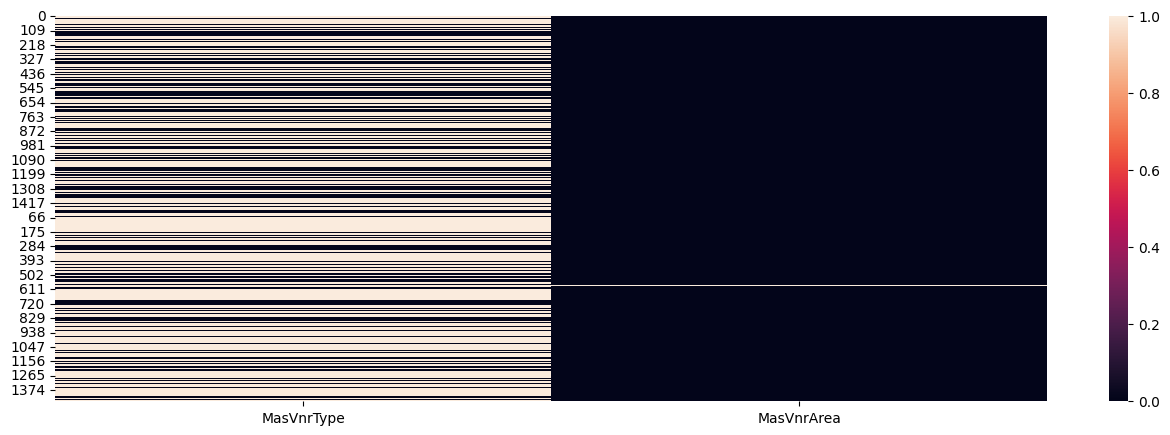

In [49]:
# Handeling MasVnrType = 0.822199 MasVnrArea = 0.787941
# finding the unique value of MasVnrType
print("Unique value of MasVnrType: ",df_mvi["MasVnrType"].unique())

# visualizing the missing value of MasVnrType and MasVnrArea
plt.figure(figsize=(16,5))
sns.heatmap(df_mvi[["MasVnrType","MasVnrArea"]].isnull())
plt.show()

In [50]:
# imputing the missing value of MasVnrType with None
df_mvi["MasVnrType"].fillna("None", inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

Count plot of MasVnrType before and after imputation


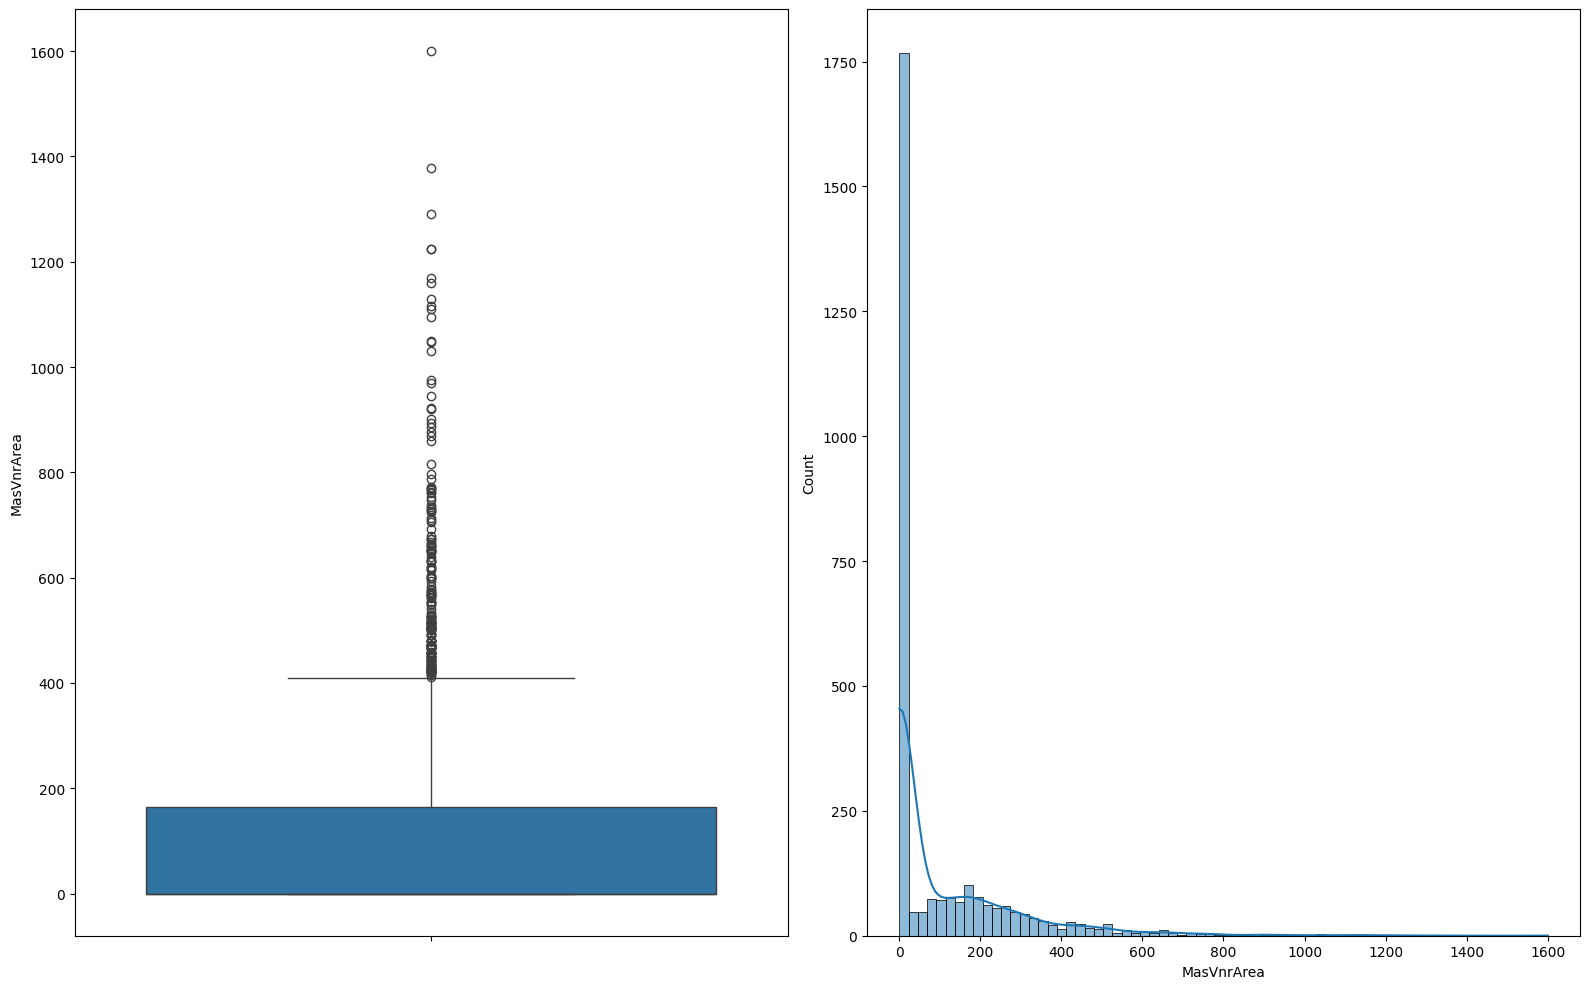

In [51]:
# visualizing the count of MasVnrType before and after imputation
print("Count plot of MasVnrType before and after imputation")
boxHistPlot(df_mvi["MasVnrArea"])

<Axes: >

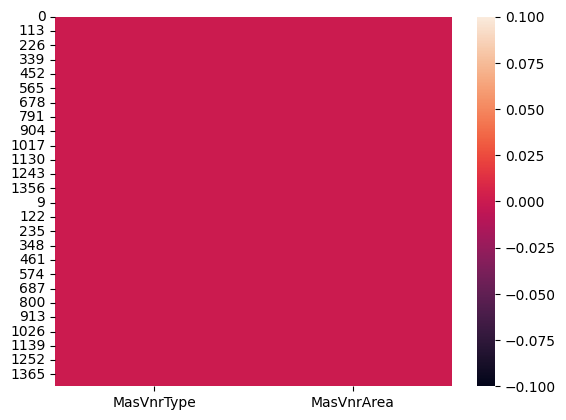

In [52]:
# imputing the missing value of MasVnrArea with 0
df_mvi["MasVnrArea"].fillna(0, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

# visualizing the null values of MasVnrType before and after imputation
sns.heatmap(df_mvi[["MasVnrType","MasVnrArea"]].isnull())

Value count of BsmtQual is BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64 
Value count of BsmtCond is BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64 
Value count of BsmtExposure is BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64 
Value count of BsmtFinType1 is BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64 
Value count of BsmtFinType2 is BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64 
Value count of BsmtUnfSF is BsmtUnfSF
0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: count, Length: 1135, dtype: int64 
Value count of TotalBsmtSF is TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1

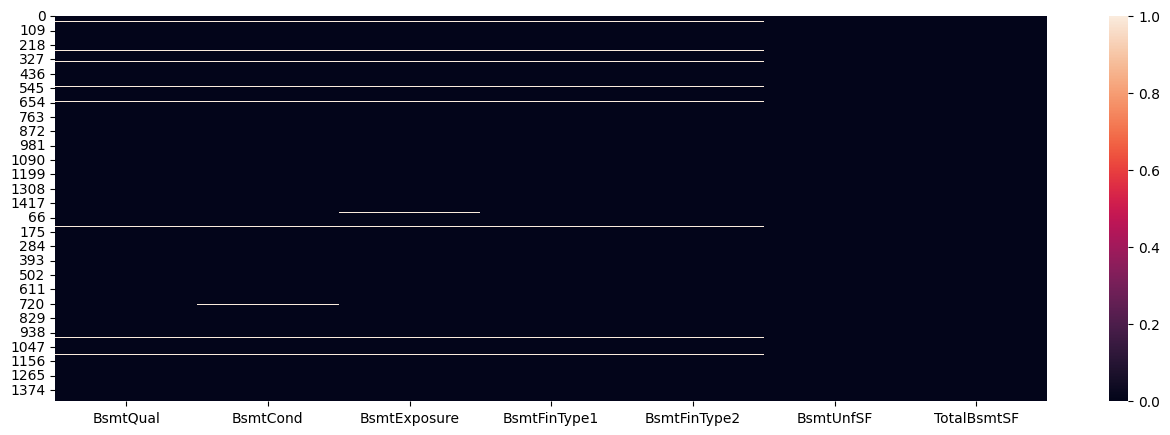

C:\Users\Harshit\AppData\Local\Temp\ipykernel_12428\3201795815.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_mvi[feat].fillna("None", inplace=True)


BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [53]:
# Handeling BsmtQual = 2.774923 BsmtCond = 2.809181 BsmtExposure = 2.809181 BsmtFinType1 = 2.706406 BsmtFinType2 = 2.740665
Bsmt_num_feature = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath']
Bsmt_cat_feature = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']

# finding the missing value of BsmtQual
for feat in Bsmt_cat_feature:
    print(f"Value count of {feat} is {df_mvi[feat].value_counts()} ")

# visualizing the missing value of BsmtQual
plt.figure(figsize=(16,5))
sns.heatmap(df_mvi[Bsmt_cat_feature].isnull())
plt.show()

# imputing the missing value of BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 with None
for feat in Bsmt_cat_feature:
    df_mvi[feat].fillna("None", inplace=True)
df_mvi[Bsmt_cat_feature].isnull().sum()

In [54]:
# visualizing the missing value of BsmtQual before and after imputation
Bsmt_feature = df_mvi[Bsmt_cat_feature+Bsmt_num_feature]
Bsmt_feature[Bsmt_feature.isnull().any(axis = 1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath
660,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
728,None,None,None,None,None,0.0,0.0,0.0,0.0,NaN,NaN


In [55]:
# imputing the missing value of BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath with 0
for feat in Bsmt_num_feature:
    df_mvi[feat].fillna(0, inplace=True)
df_mvi[Bsmt_num_feature].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [56]:
# Handeling Electrical = 0.034 KitchenQual = 0.034 KitchenAbvGr = 0.034

df_mvi_akk = df_mvi[["Electrical","KitchenQual","KitchenAbvGr"]]
df_mvi_akk[df_mvi_akk.isnull().any(axis = 1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [57]:
# imputing the missing value of Electrical with mode
# in future we can create a function to impute the missing value
elec_mode = df_mvi["Electrical"].mode()[0]
df_mvi["Electrical"].fillna(elec_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [58]:
# imputing the missing value of KitchenQual with mode
KitchenQual_mode = df_mvi["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].fillna(KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

In [ ]:
# Handeling remaining cat feature
"""""
Functional          0.068517 mode
FireplaceQu        48.646797 None
PoolQu               99.657417 None
Fence                  80.4385    None
MiscFeature         96.4028   None
SaleType              0.0342578 mode """

# finding the value count of Functional
df_mvi["Functional"].value_counts()
# finding the value count of SaleType
df_mvi["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [60]:
# imputing the missing value of Functional with mode
functional_mode = df_mvi["Functional"].mode()[0]
df_mvi["Functional"].fillna(functional_mode, inplace=True)  
df_mvi["Functional"].isnull().sum()

0

In [61]:
# imputing the missing value of SaleType with mode
saleType_mode = df_mvi["SaleType"].mode()[0]
df_mvi["SaleType"].fillna(saleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [62]:
# handelling the remaining categorical feature
other_cat_feature = ["FireplaceQu",
"Fence",                  
"MiscFeature"]  
# finding the value count of other_cat_feature
for feat in other_cat_feature:
    print(f"Value count of {feat} is {df_mvi[feat].value_counts()} ")

Value count of FireplaceQu is FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64 
Value count of Fence is Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64 
Value count of MiscFeature is MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64 


In [63]:
# imputing the missing value of other_cat_feature with None
for feat in other_cat_feature:
    df_mvi[feat].fillna("None", inplace=True)
df_mvi[other_cat_feature].isnull().sum()

FireplaceQu    0
Fence          0
MiscFeature    0
dtype: int64

In [ ]:
# Handeling Garage Features
"""
GarageType           5.378554   None

GarageFinish         5.447071   None
GarageQual           5.447071   None
GarageCond           5.447071  None

GarageYrBlt          5.447071    0
GarageCars           0.034258   0
GarageArea           0.034258   0"
"""

'\nGarageType           5.378554   NA\n\nGarageFinish         5.447071   NA\nGarageQual           5.447071   NA\nGarageCond           5.447071  NA\n\nGarageYrBlt          5.447071    0\nGarageCars           0.034258   0\nGarageArea           0.034258   0"\n'

In [65]:
num_garage_feature = ['GarageYrBlt', 'GarageCars', 'GarageArea']
cat_garage_feature = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df_mvi_garage = df_mvi[cat_garage_feature+num_garage_feature]
df_mvi_garage[df_mvi_garage.isnull().any(axis = 1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [66]:
# imputing the missing value of num_garage_feature with 0
for feat in num_garage_feature:
    df_mvi[feat].fillna(0, inplace=True)
df_mvi[num_garage_feature].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [67]:
# imputing the missing value of cat_garage_feature with None
for feat in cat_garage_feature:
    df_mvi[feat].fillna("None", inplace=True)

In [68]:
# finding the null value in mvi_df
df_mvi.isnull().sum().sort_values(ascending=False)


SalePrice      1459
CentralAir        0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
               ... 
MasVnrArea        0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
HeatingQC         0
Length: 81, dtype: int64

## 5. Feature Transformation
Converting Numerical feature into Categorical feature


In [69]:
# transforming the date/time feature
for_num_conv = ["MSSubClass" , "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [70]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,2,2008
1,20,1976,1976,1976.0,5,2007
2,60,2001,2002,2001.0,9,2008
3,70,1915,1970,1998.0,2,2006
4,60,2000,2000,2000.0,12,2008


In [71]:
# finding the unique value of MSSubClass
df_mvi["MoSold"].unique()

# converting the MoSold into month name
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x]) 

In [72]:
# converting the categorical feature into string
for feat in for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [73]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


Transforming Categorical fetur into  Numerical Feature

ordinal encoding

In [111]:
# creating the  list of ordinal feature
ordinal_end_feature = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC","Functional","GarageFinish","PavedDrive","Utilities"]
len(ordinal_end_feature)

17

In [112]:
df_mvi[ordinal_end_feature].dtypes

ExterQual         int8
ExterCond         int8
BsmtQual          int8
BsmtCond        object
BsmtExposure      int8
BsmtFinType1      int8
BsmtFinType2      int8
HeatingQC         int8
KitchenQual       int8
FireplaceQu     object
GarageQual        int8
GarageCond        int8
PoolQC          object
Functional        int8
GarageFinish      int8
PavedDrive        int8
Utilities         int8
dtype: object

In [ ]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["None","No", "Mn", "Av", "Gd"], ordered=True)).cat.codes
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['None', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['None', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['None', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NoneSeWa', 'NoneSeWr', 'AllPub'], ordered = True)).cat.codes
# we can create a function to convert the ordinal feature in future

One Hot Encoding for Nominal Categorical Data

In [76]:
# creating a copy of dataframe
df_encode = df_mvi.copy()

# extracting the object columns
object_feature = df_mvi.select_dtypes(include = ["object"]).columns.tolist()
print("Total number of object columns: ",len(object_feature))
print("object_feature name : ",object_feature)

Total number of object columns:  37
object_feature name :  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtCond', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [77]:
df_encode.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,3,...,0,None,None,None,0,Feb,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,3,...,0,None,None,None,0,May,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,3,...,0,None,None,None,0,Sep,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,3,...,0,None,None,None,0,Feb,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,3,...,0,None,None,None,0,Dec,2008,WD,Normal,250000.0


In [78]:
print("Shape before encoding: ",df_encode.shape)
df_encode = pd.get_dummies(df_encode,columns = object_feature,prefix = object_feature,drop_first = True)
print("Shape after encoding: ",df_encode.shape)

Shape before encoding:  (2919, 81)
Shape after encoding:  (2919, 2714)


## 6. Feature Selection & Splitting Data
We select relevant features, encode categorical variables, and split the data into training and test sets.


In [79]:
# splitting the data into train and test
len_train = train.shape[0]
x_train = df_encode[:len_train].drop("SalePrice", axis = 1)
y_train = df_encode["SalePrice"][:len_train]

x_test = df_encode[len_train:].drop("SalePrice", axis = 1)
y_test = df_encode["SalePrice"][len_train:]

print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (1460, 2713)
Shape of y_train:  (1460,)
Shape of x_test:  (1459, 2713)
Shape of y_test:  (1459,)


Feature Scaling

In [80]:
sc = StandardScaler()
sc.fit(x_train)
# Formula = z = (x - u) / s
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [81]:
x_train[:3,:]

array([[-1.73086488, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 ,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [82]:
x_test[:3,:]

array([[ 1.73323755,  0.45789401,  0.11076257, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73561022,  0.50331075,  0.37584985, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7379829 ,  0.18539358,  0.33205282, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [83]:
sc.mean_.shape

(2713,)

## Model Selection
We trained multiple regression models and compared their performance using R², MAE, and RMSE.
The best-performing model was **Random Forest**, which achieved an R² score of 0.85.


In [84]:
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
gp = GaussianProcessRegressor()
lr = LinearRegression()
sgd = SGDRegressor()
iso = IsotonicRegression()
mlp = MLPRegressor()
xgb = XGBRegressor()



In [85]:
models = {"SVR": ["SVR", svr],
          "KNN": ["KNN", knn],
          "DT": ["DT", dt],
          "RF": ["RF", rf],
          "GB": ["GB", gb],
          "GP": ["GP", gp],
          "LR": ["LR", lr],
          "SGD": ["SGD", sgd],
        #   "ISO": ["ISO", iso],
          "MLP": ["MLP", mlp],
          "XGB": ["XGB", xgb]}

In [86]:
for model in models:
    print(models[model][0])

SVR
KNN
DT
RF
GB
GP
LR
SGD
MLP
XGB


In [87]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer,r2_score

def test_model(model, x_train, y_train, cv):
    kfold = KFold(n_splits = cv, random_state = 42, shuffle = True)
    r2 = make_scorer(r2_score)
    r2_val = cross_val_score(model ,x_train, y_train, cv = kfold, scoring = r2)
    score = [ r2_val.mean()]
    return score

In [88]:
model_score = []
for model in models:
    print(f"Training model {models[model][0]}")
    score = test_model(models[model][1], x_train, y_train, 5)
    print(f"Score of model : {score[0]}")
    model_score.append(score[0])

Training model SVR
Score of model : -0.05431887145976133
Training model KNN
Score of model : -0.274047021128485
Training model DT
Score of model : 0.7432148168648567
Training model RF
Score of model : 0.8349822117720489
Training model GB
Score of model : 0.8290254868455685
Training model GP
Score of model : -5.29323350808412
Training model LR
Score of model : 0.7020972179045483
Training model SGD
Score of model : -218961845.79241842
Training model MLP


C:\Users\Harshit\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harshit\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harshit\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harshit\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

Score of model : -5.100477389553447
Training model XGB
Score of model : 0.8263354303401595


In [117]:
import pickle

# Assume your trained model is stored in a variable called `model`
with open("house_price_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")


Model saved successfully!


Train ML Model

Hypermeter Tuning


In [89]:
from sklearn.model_selection import GridSearchCV


In [90]:
param_grid = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples in a leaf node
}



In [91]:
grid_search = GridSearchCV(
    estimator=rf,         # Model
    param_grid=param_grid, # Parameter grid
    cv=5,                 # 5-Fold Cross Validation
    scoring='r2',         # Scoring metric (R² for regression)
    n_jobs=-1,            # Use all CPU cores for speed
    verbose=2             # Show progress
)

grid_search.fit(x_train, y_train)  # Train using grid search


Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=7, scoring='r2', n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

print("Best XGB Parameters:", grid_search_xgb.best_params_)
print("Best XGB Score:", grid_search_xgb.best_score_)
